In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix, roc_auc_score

from transformers import pipeline
import torch

In [ ]:
classifier = pipeline("sentiment-analysis")
type(classifier)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


transformers.pipelines.text_classification.TextClassificationPipeline

In [ ]:
classifier("I am happy today")

[{'label': 'POSITIVE', 'score': 0.9998788833618164}]

In [ ]:
classifier([
    "This was great movie",
    "But Hero died in the end"
            ])

[{'label': 'POSITIVE', 'score': 0.9998685121536255},
 {'label': 'NEGATIVE', 'score': 0.9855704307556152}]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix, roc_auc_score

from transformers import pipeline
import torch

# Ensure airline_tweets is defined before being used
airline_tweets =  pd.read_csv("/Tweets.csv") # This line loads the data into the variable 'airline_tweets'

df = airline_tweets[["airline_sentiment","text"]]
df.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<ipython-input-12-53a3601de68c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=df, palette= 'viridis');


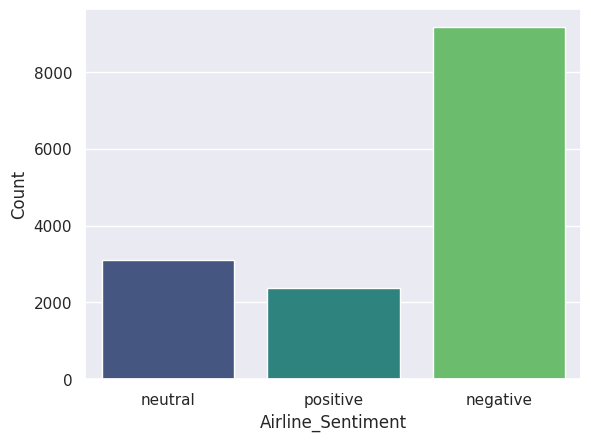

In [ ]:
sns.countplot(x="airline_sentiment", data=df, palette= 'viridis');
plt.xlabel('Airline_Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
df = df[df['airline_sentiment'] != 'neutral']

In [ ]:
df['target'] = df['airline_sentiment'].map({'positive':1, 'negative':0})
df.head(5)

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [ ]:
print("number of rows:",df.shape[0])

number of rows: 11541


In [ ]:
classifier = pipeline("sentiment-analysis") # This line defines the 'classifier' variable
texts = df['text'].tolist()
predictions = classifier(texts)
predictions[:5]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.6070863604545593},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553208947181702}]

In [ ]:
probs = [pred['score'] if pred['label'].startswith('POS') else 1 - pred['score'] for pred in predictions]

In [ ]:
preds = np.array([1 if pred['label'].startswith('POS') else 0 for pred in predictions])

In [ ]:
print(f"accuracy: {round(np.mean(df['target'] == preds)*100,2)}%")

accuracy: 88.99%


In [ ]:
cm = confusion_matrix(df['target'], preds, normalize='true')

In [ ]:
def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8,6))
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

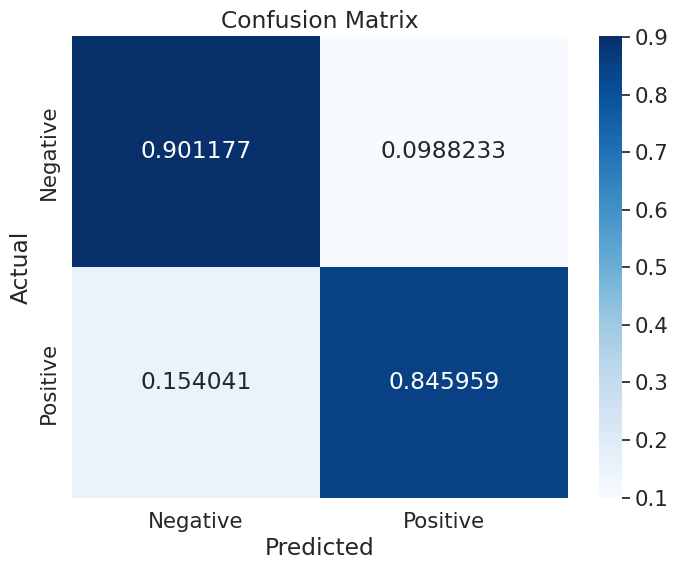

In [ ]:
plot_confusion_matrix(cm, ['Negative', 'Positive'])

In [ ]:
print(f"roc_auc_score: {roc_auc_score(df['target'], probs)}")

roc_auc_score: 0.9485934921195112
